## Lesson 5: Spikes and spike train statistics

As we've seen from previous examples, much of the data generated by the brain consists of spikes (i.e., action potentials). We all know that neurons spike when they are excited, but what does this mean quantitatively?

In this lesson, we'll dive into a fairly simple but foundational model that attempts to quantify spiking as the function of an underlying **rate**.

Our goals are to:

- understand homogeneous and inhomogeneous Poisson process models
- be able to estimate the latent rate variable in Poisson models


### Readings

Before coming to class, you should have finished reading Chapter 1 in Dayan and Abbott.

For a more in-depth treatment, consult the following papers:

- Nawrot M, et al. Single-trial estimation of neuronal firing rates: From single-neuron spike trains to population activity. J Neurosci Methods. [doi:10.1016/S0165-0270(99)00127-2](https://doi.org/10.1016/S0165-0270(99)00127-2)
- Shinomoto S. Estimating the Firing Rate. In: Analysis of Parallel Spike Trains. [doi:10.1007/978-1-4419-5675-0_2](https://doi.org/10.1007/978-1-4419-5675-0_2)


### More point process math

Recall that a point process is an (ordered) sequence of event times:

$$X = \{t_0, t_1, \ldots, t_{N-1}\}$$

We can represent this as a function by making each spike a [Dirac delta function](https://en.wikipedia.org/wiki/Dirac_delta_function):

$$\rho(t) = \sum_{i=0}^{N-1} \delta(t - t_i)$$

![spike_train](images/l5_spike_train.png "spike train delta function")

Because the area under each delta function is 1, this allows us to count spikes or calculate any continuous function of a spike train through integration.

For example, the **rate** is defined as the number of spikes $N$ that occurred in some interval divided by the duration of the interval, $T$:

$$R = \frac{N}{T} = \frac{1}{T} \int_{0}^{T} d\tau\; \rho(\tau)$$

![spike_train_rate](images/l5_rate_integral.png "spike train rate integral")

### Spiking as a random variable

Neural responses are **stochastic**. Even under "identical" conditions, spike trains will vary from trial to trial.

In other words, the response $\rho(t)$ is a **random variable**. The probability of observing a particular response is given by a **distribution**, $p(\rho(t))$.

We can also represent the stimulus $\vec{s}(t)$ as a random variable with a distribution $p(\vec{s}(t))$, even if it's under experimental control.

### Review of probability

Leaving out the notation indicating that both $\rho$ and $\vec{s}$ are functions of time, the following distributions are of interest:

The joint distribution $p(\rho, \vec{s})$ is the probability of $\rho$ and $\vec{s}$ occurring together. This is likely to be a very small number because the space of $\vec{s}$ is potentially quite large.

Thus, we are often more interested in the conditional probability $p(\rho|\vec{s})$, which is the probability of observing $\rho$ when $\vec{s}$ is presented.

The marginal probability $p(\rho)$ indicates the probability of observing $\rho$ irrespective of which stimulus was presented.

There are two mathematical identities that allow us to convert between these distributions. 

#### Conditional Probability

$$p(\rho,\vec{s}) = p(\rho|\vec{s})p(\vec{s}) = p(\vec{s}|\rho)p(\rho)$$

If $p(\rho|\vec{s}) = p(\rho)$, then $\rho$ and $\vec{s}$ are **independent**. $p(\rho)$ is the same regardless of what $\vec{s}$ is. This means that for independent variables, the joint distribution is simply the product of the marginal distributions.

$$p(\rho,\vec{s}) = p(\rho)p(\vec{s})$$

#### Marginal Probability

We can convert a joint probability distribution to a marginal probability distribution by summing (integrating) the probabilities of one of the variables.

$$p(\rho) = \int d\vec{s}\; p(\rho, \vec{s}) = \int d\vec{s}\; p(\rho|\vec{s}) p(\vec{s})$$

### Spike-train statistics

Let's apply these concepts to spike trains:

The probability of of a sequence of $N$ spikes $X = \{t_0,\ldots,t_{N-1}\}$ is the joint probability density of all the individual spikes: 

$$p(t_0, t_1, \ldots, t_{N-1})$$

If the spikes are independent, then this joint distribution is simply the product of the distributions for each spike:

$$p(t_0, \ldots, t_{N-1}) = \prod_{i=0}^{N-1}p(t_i)$$

When each spike is independent of every other spike, we have a **Poisson process**.

### Homogeneous Poisson Processes

If $t_i$ is independent of all the other spikes, what does it depend on?

In the simplest case, $p(t_i)$ depends only on the **rate** of spiking, $R$.

In a homogeneous Poisson process, the rate is constant. In this case, in an interval $(t_i, t_i + \Delta)$, we would expect to observe $\lambda = R\Delta$. The distribution of the number of events we actually observe, $n$, is given by the Poisson distribution:

$$p(n|\lambda) = \frac{\lambda^n}{n!}\exp(-\lambda)$$

Let's explore some properties of the Poisson distribution in Python. Here's a graph of the distribution from wikipedia:

![poisson_distro](https://upload.wikimedia.org/wikipedia/commons/1/16/Poisson_pmf.svg)

In [22]:
# load matplotlib inline mode
%matplotlib inline

# import some useful libraries
import numpy as np                # numerical analysis linear algebra
import matplotlib.pyplot as plt   # plotting

# import the poisson distro
from tools import dists

p(5|lambda=1) = 0.00306566200976202


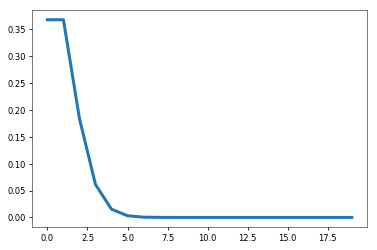

In [23]:
# first, let's define our *support*: the values over which we want to evalute p(n):
supp = np.arange(0, 20)

# next, we *instantiate* the distribution object with our parameter lambda
dist = dists.poisson(1.0)

# you can get the probability of any value in the distribution with .pmf. Note that we have to use
# pmf (probability mass function) rather than pdf.
print("p(5|lambda=1) =", dist.pmf(5))

# we can also evaluate the distribution over a vector of numbers
prob = dist.pmf(supp)

# and plot the distribution with plt.plot
plt.plot(supp, prob, lw=3)

**Q**: In the cell below, try to evaluate the `prob` distribution for negative or non-integral numbers. Given the definition of the Poisson distribution, why is this the case?

**Q** Recall that $\lambda = R\Delta$. If $R = 1$ Hz and you steadily reduce $\Delta$ from 1.0 s to 1.0 microseconds, what is the probability of observing one spike in that interval? Write a *for loop* to evaluate and plot this. Does this make sense? What is the probability of a spike occurring at some *exact* time?

In [24]:
Delta = [1e0, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5, 1e-5, 5e-6, 1e-6]

In addition to plotting the probability distribution, Python can generate random samples (i.e, **draw**) from the Poisson distribution, too.

In [25]:
# note: 'lambda' is a reserved symbol in python
lam = 1.0
dist = dists.poisson(lam)
# rvs stands for random value(s)
n = dist.rvs(1000)

**Q** In the cell below, calculate the sample mean and standard deviation for n, then try with a few other values of lambda.

In [26]:
print("The sample mean when lambda=", lam, "is", np.mean(n))

The sample mean when lambda= 1.0 is 0.942


- Mean: $\mu =$
- Standard deviation: $\sigma =$
- Fano factor $\sigma^2/\mu =$

### From Poisson distribution to Poisson process

How can we generate a series of spike times from the Poisson distribution? The trick is to divide your response interval up into a set of smaller intervals (or **bins**) such that the probability of observing more than one spike in a single bin is very small, then draw from $p(n|\lambda)$ for each bin.

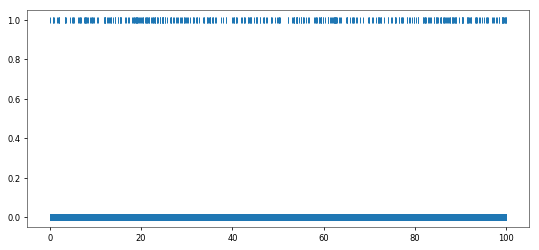

In [27]:
T     = 100     # s
rate  = 4.0     # Hz
Delta = 0.001   # s
dist   = dists.poisson(rate * Delta)
spikes = dist.rvs(int(T / Delta))
bins   = np.arange(0, T, Delta)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
axes.plot(bins, spikes, "|")

The plot of the `spikes` array should only show `0` and `1` values. If it doesn't, what do you need to do?

You can think of `spikes` as a sort of time series representation of the point process. 

To get the actual spike times, we need to find the bins where there is a spike and then look up the times in the `bins` array:

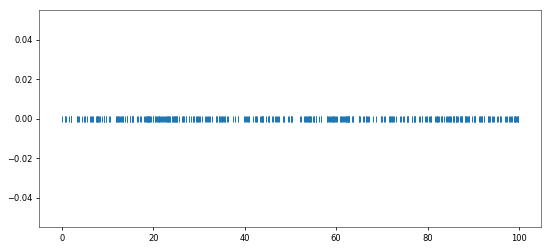

In [28]:
spike_i = np.nonzero(spikes)[0]
spike_t = bins[spike_i]
# here's one way to plot a raster of spike times
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
axes.plot(spike_t, np.zeros_like(spike_t), "|")

### More spike train statistics

**Q** Here's a slightly harder question about the properties of Poisson processes. Calculate the interspike *intervals* from `spike_t` (hint: look at the documentation for `np.diff`), then plot a histogram. What function does this look like? Calculate the sample mean and variance. How do these relate to the rate of the process? What is the coefficient of variation of the interspike distribution (CV = $\mu / \sigma$)?

### Inhomogeneous Poisson Processes

It's also possible for the rate of a Poisson process to vary in time; that is, for $\lambda$ to be a function of $t$.

$$p(n|\lambda(t)) = \frac{\lambda(t)^n}{n!}\exp(-\lambda(t))$$

As before, we need to discretize time and determine the probability that there is a spike in some interval $(t, t + \Delta)$; the only difference is that some intervals are more likely to have spikes than others.

We could simulate an inhomogeneous Poisson process in much the same way, but we need to vary $\lambda$ in each bin. There's a somewhat easier method that's based on the Bernoulli distribution.

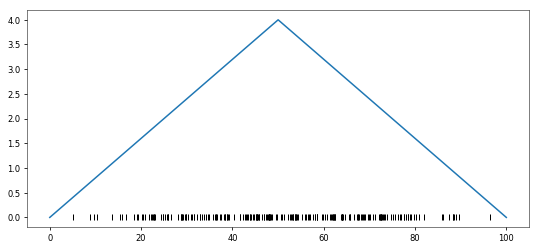

In [34]:
T     = 100     # s
Delta = 0.001   # s
N     = int(T / Delta)
bins  = np.arange(0, T, Delta)
# rate is now a function of time
rate  = np.concatenate([np.linspace(0.0, 4.0, N//2),
                        np.linspace(4.0, 0.0, N//2)])

# generate N values from a uniform distribution
rand = dists.uniform().rvs(N)
# compare each value to lambda = rate * Delta
lam  = rate * Delta
spikes = (rate * Delta) > rand
spike_i = np.nonzero(spikes)[0]
spike_t = bins[spike_i]
# here's one way to plot a raster of spike times
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
axes.plot(bins, rate)
axes.plot(spike_t, np.zeros_like(spike_t), "k|")


**Q** Calculate the mean, variance, and CV of the interspike intervals for this spike train. Is the relationship with the rate the same as you discovered for the homogeneous process?

## Estimating spike rates

Let's think about how we can estimate $\lambda$ for Poisson processes.

If we assume that the process is homogeneous over each trial, then we have a simple observational model where the number of spikes is a random sample from the Poisson distribution.

$$p(y_i|\lambda) = \frac{\lambda^n}{n!}\exp(-\lambda)$$

Given a set of trials, we can estimate $\lambda$ using a simple maximum-likelihood procedure like we explored in the last lesson.

If we're presenting different stimuli on each trial, we can model $\lambda$ as depending on some function of which stimulus was present. If the function is the exponential of a linear sum, then we have a generalized linear model. More on this later.

The problem is a lot trickier if the process is inhomogeneous, because now we're trying to estimate a continuous function of time, $\lambda(t)$.

In this setting, people usually talk about rate rather than intensity ($\lambda$), so we'll use $r(t)$ from here on.

The issue we confront is that $r(t)$ is a continuous function. We can discretize it into small intervals of $(t, t + \Delta)$ and count the number of spike in each interval, but as we make $\Delta$ smaller to get higher temporal resolution, we reach the point at which each bin has either one or zero spikes, which doesn't tell us much about the rate. We can address this problem by averaging across multiple trials. If we use $\langle \rangle$ to denote averaging across trials, this looks like:

$$r(t) = \frac{1}{\Delta} \int_t^{t+\Delta} d\tau\; \langle \rho(t) \rangle$$

You hopefully can see that as $\Delta$ gets smaller, the number of trials you need to average to get a smooth function gets larger. So part of our problem is to determine what $\Delta$ should be. More practically, at what time scale do we think the rate is changing?

There are a number of different ways of approximating $r(t)$. We'll look at a couple.

### Spike time histogram

This is also called a peri-stimulus spike time histogram (PSTH), even when there isn't a stimulus.

The simplest way of approximating the rate is to divide the interval up into a fixed number of bins of duration $\Delta$ and count how many spikes occurred in each bin. The rate is simply the number of spikes divided by $\Delta$.

The main problem with histograms is setting the bin size. Try adjusting the binsize variable and see what gives you the best tradeoff between variability and temporal resolution.

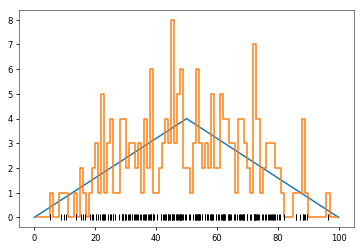

In [53]:
binsize = 1.0
r_est, edges  = np.histogram(spike_t, bins=np.arange(0, T, binsize))
plt.plot(bins, rate)
plt.step(edges[1:], r_est / binsize)
plt.plot(spike_t, np.zeros_like(spike_t), "k|")

### Smoothing